In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

In [2]:
df = pd.read_excel(r"C:\Users\USER\Desktop\Data-Science\Microsoft_Stock(1).csv.xlsx")

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322
1,2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476
2,2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692
3,2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375
4,2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438


In [4]:
 df = df[['Date', 'Close']]

In [5]:
df

,Date,Close
0,2015-04-01 16:00:00,40.72
1,2015-04-02 16:00:00,40.29
2,2015-04-06 16:00:00,41.55
3,2015-04-07 16:00:00,41.53
4,2015-04-08 16:00:00,41.42
...,...,...
1506,2021-03-25 16:00:00,232.34
1507,2021-03-26 16:00:00,236.48
1508,2021-03-29 16:00:00,235.24
1509,2021-03-30 16:00:00,231.85


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1511 non-null   datetime64[ns]
 1   Close   1511 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 23.7 KB


In [7]:
df.head()

,Date,Close
0,2015-04-01 16:00:00,40.72
1,2015-04-02 16:00:00,40.29
2,2015-04-06 16:00:00,41.55
3,2015-04-07 16:00:00,41.53
4,2015-04-08 16:00:00,41.42


In [8]:
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
df.head()

,Date,Close
0,2015-04-01 16:00:00,40.72
1,2015-04-02 16:00:00,40.29
2,2015-04-06 16:00:00,41.55
3,2015-04-07 16:00:00,41.53
4,2015-04-08 16:00:00,41.42


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1511 non-null   datetime64[ns]
 1   Close   1511 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 23.7 KB


In [11]:
df = df.set_index('Date')

In [12]:
df.head()

,Close
Date,
2015-04-01 16:00:00,40.72
2015-04-02 16:00:00,40.29
2015-04-06 16:00:00,41.55
2015-04-07 16:00:00,41.53
2015-04-08 16:00:00,41.42


In [30]:
#time plot

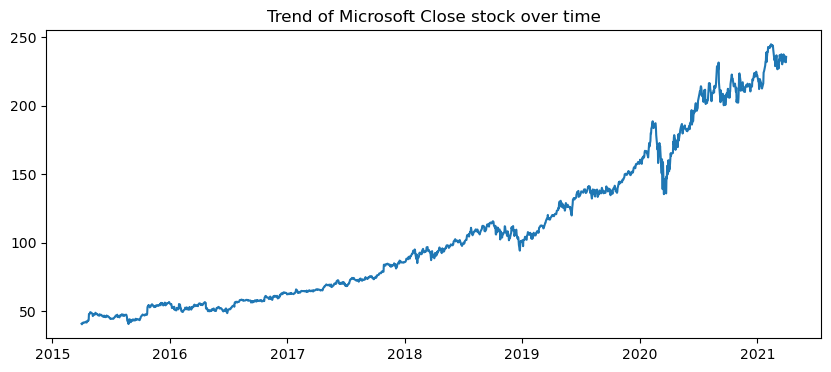

In [31]:
plt.figure(figsize = (10,4))
plt.plot(df['Close'])
plt.title('Trend of Microsoft Close stock over time')
plt.show()

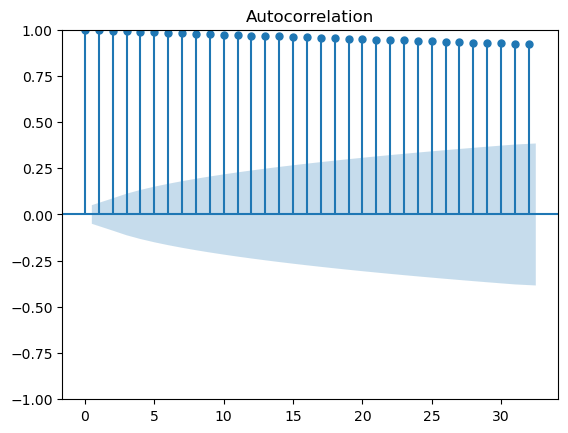

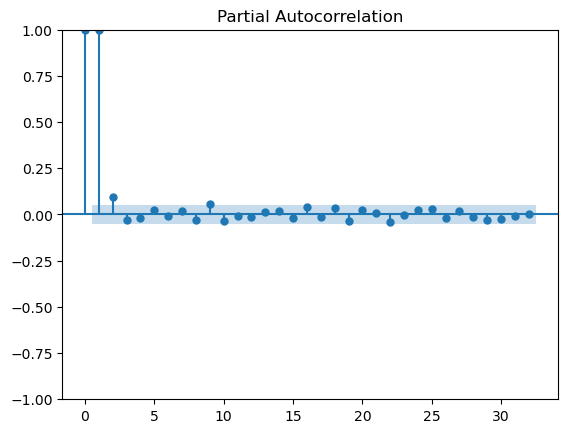

In [32]:
 #ACF and PACF of original series
 plot_acf(df)
 plt.show()
 plot_pacf(df)
 plt.show()

In [34]:
#adfuller test
adfuller(df)

(np.float64(1.7371362899270972),
 np.float64(0.9982158366942122),
 24,
 1486,
 {'1%': np.float64(-3.4347582315402434),
  '5%': np.float64(-2.863486949792871),
  '10%': np.float64(-2.567806534528638)},
 np.float64(6604.225695235948))

In [35]:
 def adfuller_test(df, col):
    test = adfuller(df[col])
    p_value = round(test[1], 3)
    if p_value <= 0.05:
        return(f"p-value: {p_value}, The series is stationary")
    else:
        return(f"p-value: {p_value}, The series is not stationary, differecing is needed")
 adfuller_test(df, 'Close')

'p-value: 0.998, The series is not stationary, differecing is needed'

In [36]:
 df['Close_diff'] = df.diff()

In [37]:
 df = df.dropna()

In [38]:
df.head()

,Close,Close_diff
Date,,
2015-04-02 16:00:00,40.29,-0.43
2015-04-06 16:00:00,41.55,1.26
2015-04-07 16:00:00,41.53,-0.02
2015-04-08 16:00:00,41.42,-0.11
2015-04-09 16:00:00,41.48,0.06


In [39]:
 adfuller_test(df, 'Close_diff')

'p-value: 0.0, The series is stationary'

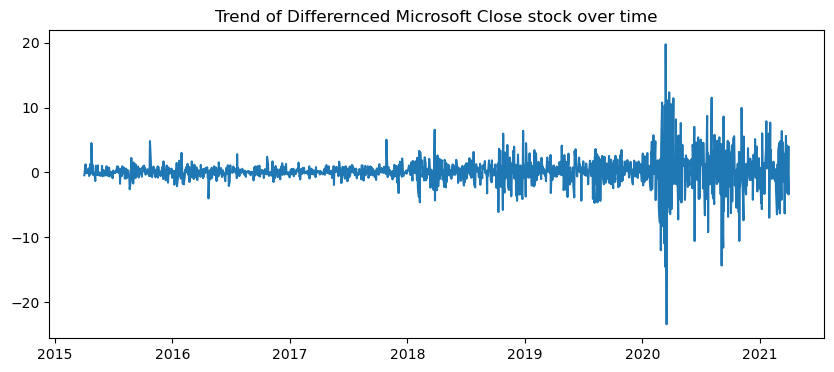

In [40]:
 #time plot
 plt.figure(figsize = (10,4))
 plt.plot(df['Close_diff'])
 plt.title('Trend of Differernced Microsoft Close stock over time')
 plt.show()

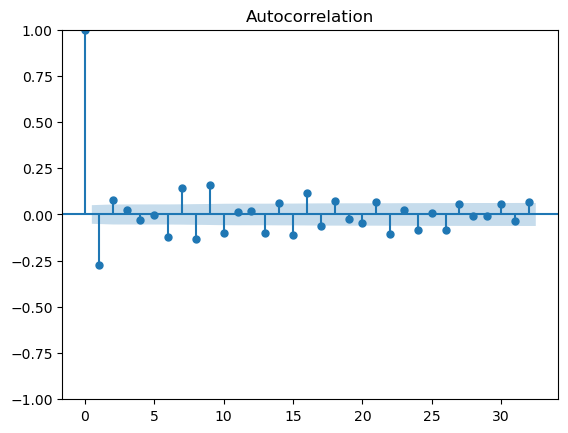

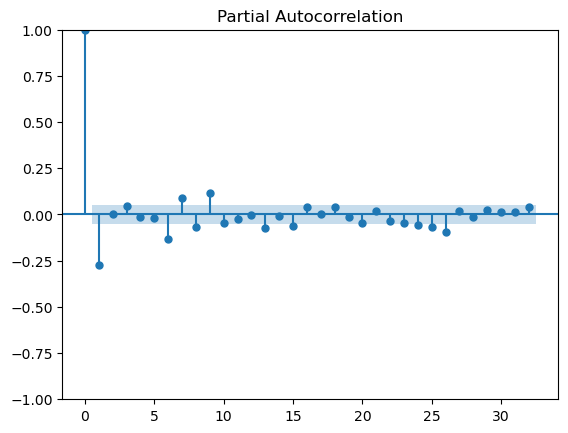

In [42]:
#ACF and PACF of original series
plot_acf(df['Close_diff'])
plt.show()
plot_pacf(df['Close_diff'])
plt.show()

In [44]:
import warnings
warnings.filterwarnings('ignore')

In [45]:
order = (5,1,2)
model = ARIMA(df['Close'], order = order)

In [46]:
 results = model.fit()

In [47]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1510
Model:                 ARIMA(5, 1, 2)   Log Likelihood               -3369.529
Date:                Thu, 06 Nov 2025   AIC                           6755.057
Time:                        19:59:53   BIC                           6797.611
Sample:                             0   HQIC                          6770.905
                               - 1510                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8643      0.065     13.205      0.000       0.736       0.993
ar.L2         -0.4841      0.053     -9.162      0.000      -0.588      -0.381
ar.L3         -0.1921      0.021     -8.988      0.000      -0.234      -0.150
ar.L4         -0.0621      0.019     -3.319      0.001      -0.099      -0.025
ar.L5          0.0038      0.017      0.222      0.824      -0.030       0.037
ma.L1         -1.1398      0.062    -18.275      0.000      -1.262      -1.018
ma.L2          0.8214      0.058     14.263      0.000       0.709       0.934
sigma2         5.0931      0.080     63.627      0.000       4.936       5.250
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):              8350.40
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):              19.98   Skew:                            -0.61
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [1]:
pip install prophet


   ---------------------------------------- 0.0/12.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/12.1 MB 2.0 MB/s eta 0:00:06
   -- ------------------------------------- 0.8/12.1 MB 1.7 MB/s eta 0:00:07
   --- ------------------------------------ 1.0/12.1 MB 1.6 MB/s eta 0:00:07
   ----- ---------------------------------- 1.6/12.1 MB 1.7 MB/s eta 0:00:07
   ------ --------------------------------- 1.8/12.1 MB 1.7 MB/s eta 0:00:07
   ------ --------------------------------- 2.1/12.1 MB 1.7 MB/s eta 0:00:06
   ------- -------------------------------- 2.4/12.1 MB 1.5 MB/s eta 0:00:07
   -------- ------------------------------- 2.6/12.1 MB 1.6 MB/s eta 0:00:07
   --------- ------------------------------ 2.9/12.1 MB 1.6 MB/s eta 0:00:06
   ---------- ----------------------------- 3.1/12.1 MB 1.6 MB/s eta 0:00:06
   ------------ ---

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

In [3]:
df = pd.read_excel(r"C:\Users\USER\Desktop\Data-Science\Microsoft_Stock(1).csv.xlsx")

In [4]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322
1,2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476
2,2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692
3,2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375
4,2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438


In [6]:
 df = df[['Date', 'Close']]


In [7]:
df.head()

,Date,Close
0,2015-04-01 16:00:00,40.72
1,2015-04-02 16:00:00,40.29
2,2015-04-06 16:00:00,41.55
3,2015-04-07 16:00:00,41.53
4,2015-04-08 16:00:00,41.42


In [8]:
 df.columns = ['ds', 'y']

In [9]:
df.head()

,ds,y
0,2015-04-01 16:00:00,40.72
1,2015-04-02 16:00:00,40.29
2,2015-04-06 16:00:00,41.55
3,2015-04-07 16:00:00,41.53
4,2015-04-08 16:00:00,41.42


In [10]:
model = Prophet()

In [11]:
model.fit(df)

02:00:06 - cmdstanpy - INFO - Chain [1] start processing
02:00:08 - cmdstanpy - INFO - Chain [1] done processing


In [12]:
 future = model.make_future_dataframe(periods = 250)

In [13]:
 forecast = model.predict(future)

In [14]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-04-01 16:00:00,31.656669,32.638135,45.547404,31.656669,31.656669,7.326343,7.326343,7.326343,-12.078212,...,24.279945,24.279945,24.279945,-4.875390,-4.875390,-4.875390,0.0,0.0,0.0,38.983012
1,2015-04-02 16:00:00,31.668910,32.760004,45.550600,31.668910,31.668910,7.531933,7.531933,7.531933,-12.078212,...,24.240761,24.240761,24.240761,-4.630616,-4.630616,-4.630616,0.0,0.0,0.0,39.200843
2,2015-04-06 16:00:00,31.717870,33.362792,46.731569,31.717870,31.717870,8.466220,8.466220,8.466220,-12.078212,...,24.134716,24.134716,24.134716,-3.590284,-3.590284,-3.590284,0.0,0.0,0.0,40.184090
3,2015-04-07 16:00:00,31.730110,34.287837,47.021557,31.730110,31.730110,8.822280,8.822280,8.822280,-12.078212,...,24.226726,24.226726,24.226726,-3.326233,-3.326233,-3.326233,0.0,0.0,0.0,40.552390
4,2015-04-08 16:00:00,31.742350,34.526517,47.763335,31.742350,31.742350,9.137026,9.137026,9.137026,-12.078212,...,24.279945,24.279945,24.279945,-3.064707,-3.064707,-3.064707,0.0,0.0,0.0,40.879376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1756,2021-12-02 16:00:00,276.706750,277.693006,297.606157,269.434620,283.784692,10.657782,10.657782,10.657782,-12.078212,...,24.240761,24.240761,24.240761,-1.504767,-1.504767,-1.504767,0.0,0.0,0.0,287.364532
1757,2021-12-03 16:00:00,276.893165,278.391666,297.149504,269.587608,283.980293,10.617071,10.617071,10.617071,-12.078212,...,24.224907,24.224907,24.224907,-1.529624,-1.529624,-1.529624,0.0,0.0,0.0,287.510236
1758,2021-12-04 16:00:00,277.079580,204.763051,224.142989,269.741129,284.193446,-62.573231,-62.573231,-62.573231,-12.078212,...,-48.958780,-48.958780,-48.958780,-1.536240,-1.536240,-1.536240,0.0,0.0,0.0,214.506349
1759,2021-12-05 16:00:00,277.265995,181.879156,201.105855,269.887104,284.431310,-85.751546,-85.751546,-85.751546,-12.078212,...,-72.148274,-72.148274,-72.148274,-1.525060,-1.525060,-1.525060,0.0,0.0,0.0,191.514450


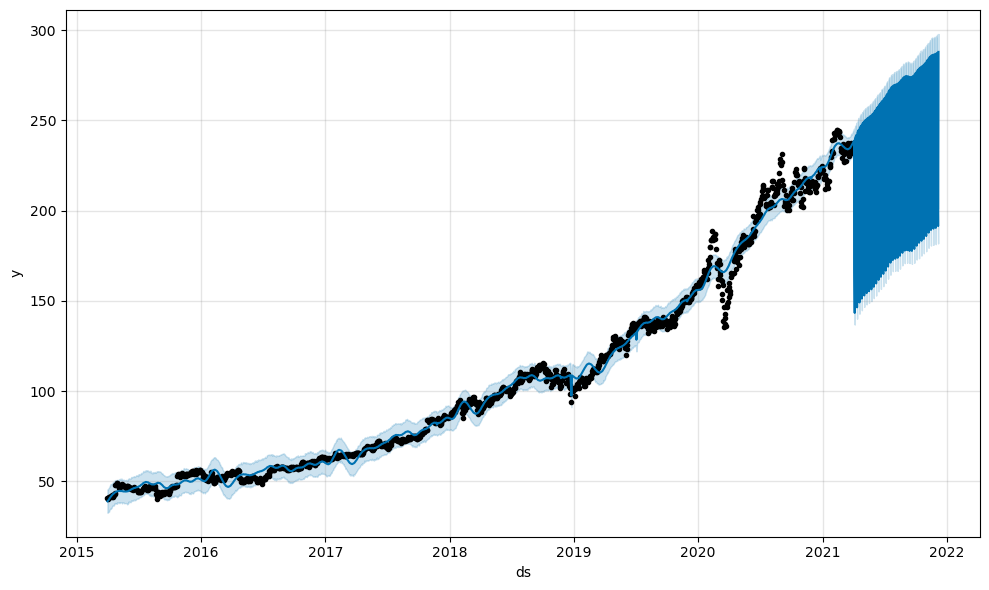

In [15]:
model.plot(forecast)
plt.show()


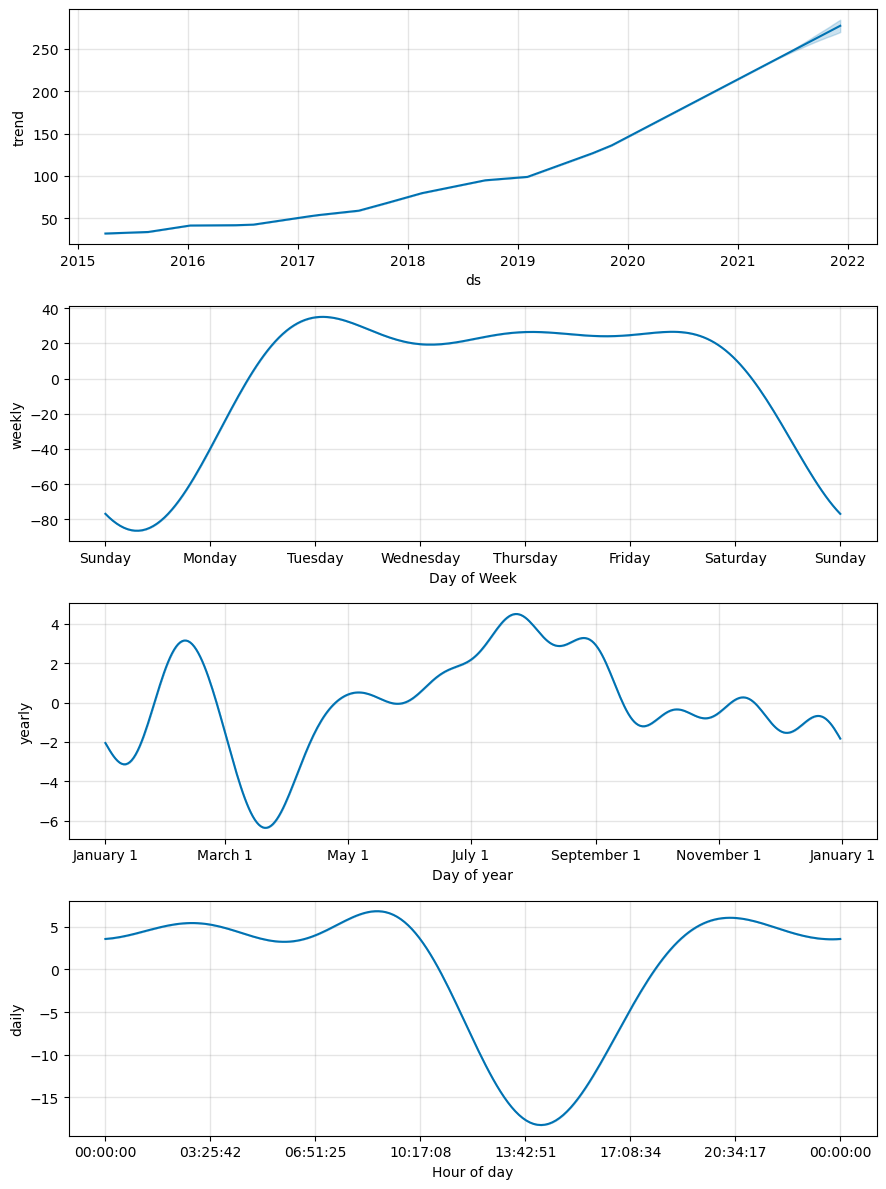

In [16]:
model.plot_components(forecast)
plt.show()